In [60]:
# Tyler Boudreau

# Import Required packages as needed throughout
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Location of Dataset must be set
df = pd.read_csv('C:\\Users\\Tyler\\Downloads\\Heart_disease_cleveland_new.csv')
print(df)
df.head(10)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak   
0     63    1   0       145   233    1        2      150      0      2.3  \
1     67    1   3       160   286    0        2      108      1      1.5   
2     67    1   3       120   229    0        2      129      1      2.6   
3     37    1   2       130   250    0        0      187      0      3.5   
4     41    0   1       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   0       110   264    0        0      132      0      1.2   
299   68    1   3       144   193    1        0      141      0      3.4   
300   57    1   3       130   131    0        0      115      1      1.2   
301   57    0   1       130   236    0        2      174      0      0.0   
302   38    1   2       138   175    0        0      173      0      0.0   

     slope  ca  thal  target  
0        2   0     2       0  
1        1   3     1     

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
5,56,1,1,120,236,0,0,178,0,0.8,0,0,1,0
6,62,0,3,140,268,0,2,160,0,3.6,2,2,1,1
7,57,0,3,120,354,0,0,163,1,0.6,0,0,1,0
8,63,1,3,130,254,0,2,147,0,1.4,1,1,3,1
9,53,1,3,140,203,1,2,155,1,3.1,2,0,3,1


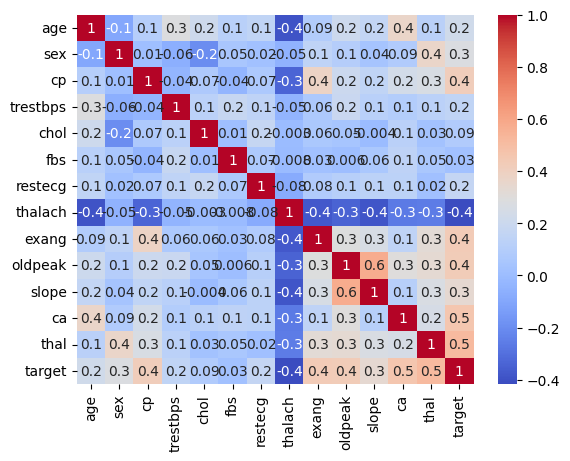

In [61]:
# Create Correlation Matrix to check for Collinearity
CorrMatrix1 = df.corr()

sb.heatmap(CorrMatrix1, cmap="coolwarm", annot=True, fmt=".1g")
plt.show()

In [62]:
X=df.iloc[:,0:13]
X
y=df['target']

# Create Train and Test Partitions
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33, random_state=3573)

# Count number 0 and 1 prediction values for Heart Disease, 0 being absent, 1 being present
y.value_counts()

def plot_roc_curve(true_y,y_predt):
    fpr, tpr, thresholds = roc_curve(true_y,y_predt)
    plt.plot(fpr,tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")


Logistic Regression Model Accuracy: 81.0000 %
     Actual  Predicted
166       0          0
182       0          1
292       1          1
22        1          0
179       0          1
..      ...        ...
41        0          0
282       1          1
200       0          0
174       1          1
18        0          0

[100 rows x 2 columns]
Logistic Regression AUC Score: 0.8066502463054187


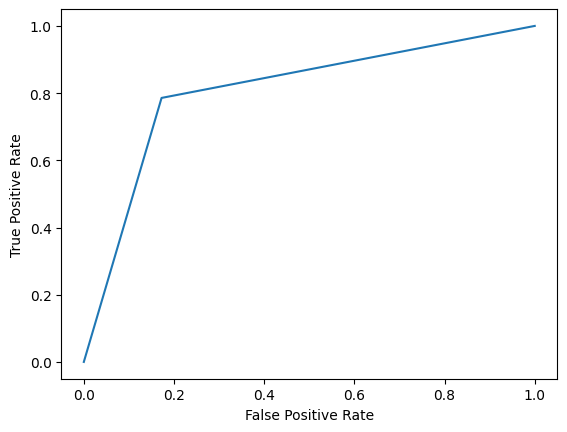

In [63]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logModel=LogisticRegression(max_iter=10000)
logModel.fit(X_train, y_train)
pred_y = logModel.predict(X_test)
from sklearn.metrics import accuracy_score
print('Logistic Regression Model Accuracy: {0:0.4f}'.format(accuracy_score(y_test,pred_y)*100),"%")
predresult1 = pd.DataFrame({"Actual" : y_test, "Predicted" : pred_y})
print(predresult1)

plot_roc_curve(y_test,pred_y)
print(f"Logistic Regression AUC Score: {roc_auc_score(y_test,pred_y)}")

In [64]:

# Testing Logistic Regression model on example data
XTestValues1 = pd.DataFrame(np.array([[63,1,0,145,233,1,2,150,0,2.3,2,0,2]]), columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"])
XTestValues2 = pd.DataFrame(np.array([[67,1,3,160,286,0,2,108,1,1.5,1,3,1]]), columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"])
Logmodelprediction1 = logModel.predict(XTestValues1)
Logmodelprediction2 = logModel.predict(XTestValues2)
print(Logmodelprediction1)
print(Logmodelprediction2)


[0]
[1]


LightGBM Model Accuracy: 76.0000 %
     Actual  Predicted
166       0          0
182       0          1
292       1          1
22        1          0
179       0          1
..      ...        ...
41        0          0
282       1          1
200       0          0
174       1          1
18        0          0

[100 rows x 2 columns]
[0]
[1]
LightGBM Model AUC Score: 0.7602627257799671


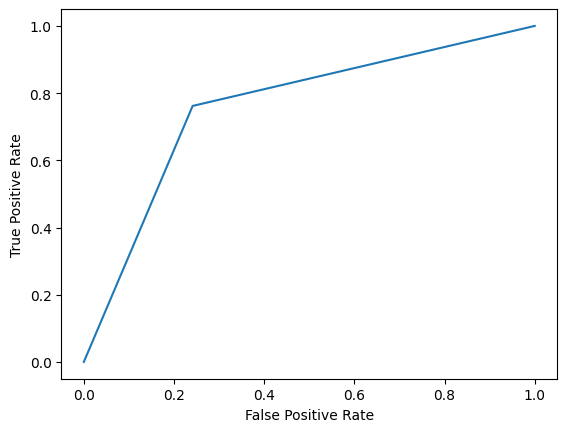

In [65]:
# LightGBM Model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model Accuracy: {0:0.4f}'.format(accuracy_score(y_test, y_pred)*100),"%")
predresult2 = pd.DataFrame({"Actual" : y_test, "Predicted" : y_pred})
print(predresult2)

LightGBMPred1 = clf.predict(XTestValues1)
LightGBMPred2 = clf.predict(XTestValues2)

print(LightGBMPred1)
print(LightGBMPred2)

plot_roc_curve(y_test,y_pred)
print(f"LightGBM Model AUC Score: {roc_auc_score(y_test,y_pred)}")


Random Forest Accuracy: 85.0 %
     Actual  Predicted
166       0          0
182       0          0
292       1          1
22        1          0
179       0          1
..      ...        ...
41        0          0
282       1          1
200       0          0
174       1          1
18        0          0

[100 rows x 2 columns]
[0]
[1]
Random Forest AUC Score: 0.8444170771756978


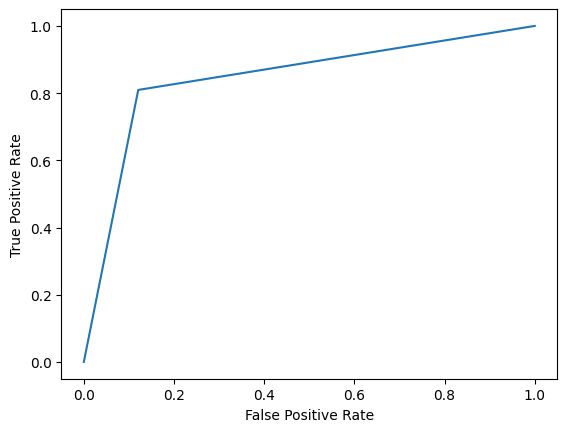

In [66]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred8 = clf.predict(X_test)
 # metrics are used to find accuracy or error
from sklearn import metrics 
print()

# using metrics module for accuracy calculation
print("Random Forest Accuracy:",metrics.accuracy_score(y_test, y_pred8)*100,"%")

predresult3 = pd.DataFrame({"Actual" : y_test, "Predicted" : y_pred8})
print(predresult3)
RandomForestPred1 = clf.predict(XTestValues1)
RandomForestPred2 = clf.predict(XTestValues2)

print(RandomForestPred1)
print(RandomForestPred2)


plot_roc_curve(y_test,y_pred8)
print(f"Random Forest AUC Score: {roc_auc_score(y_test,y_pred8)}")


ExtraTree Classifier Accuracy: 83.0 %
     Actual  Predicted
166       0          0
182       0          1
292       1          1
22        1          0
179       0          1
..      ...        ...
41        0          1
282       1          1
200       0          0
174       1          1
18        0          0

[100 rows x 2 columns]
[0]
[1]
ExtraTree AUC Score: 0.827175697865353


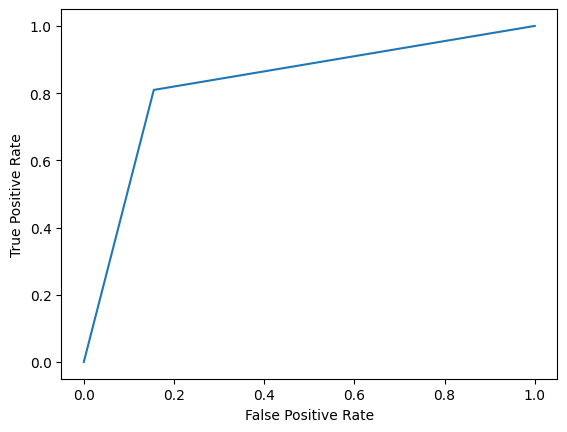

In [67]:
# ExtraTree Model
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100,max_depth=6,min_samples_split=2,min_weight_fraction_leaf =0.0,n_jobs=-1)
clf.fit(X_train, y_train)
print("ExtraTree Classifier Accuracy:",clf.score(X_test, y_test)*100,"%")
y_pred9 = clf.predict(X_test)
predresult4 = pd.DataFrame({"Actual" : y_test, "Predicted" : y_pred9})
print(predresult4)
ExtraTreePred1 = clf.predict(XTestValues1)
ExtraTreePred2 = clf.predict(XTestValues2)

print(ExtraTreePred1)
print(ExtraTreePred2)

plot_roc_curve(y_test,y_pred9)
print(f"ExtraTree AUC Score: {roc_auc_score(y_test,y_pred9)}")

XGBoost Accuracy: 78.0 %
     Actual  Predicted
166       0          0
182       0          1
292       1          1
22        1          0
179       0          1
..      ...        ...
41        0          0
282       1          1
200       0          0
174       1          1
18        0          0

[100 rows x 2 columns]
[0]
[1]
XGBoost Model AUC Score: 0.784072249589491


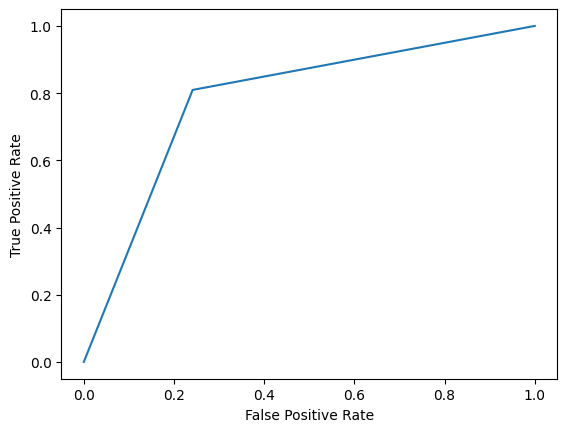

In [68]:
# XGBoost Model
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier(eval_metric='mlogloss')
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print("XGBoost Accuracy:",accuracy*100,"%")
predresult5 = pd.DataFrame({"Actual" : y_test, "Predicted" : y_pred1})
print(predresult5)
XGBoostPred1 = model.predict(XTestValues1)
XGBoostPred2 = model.predict(XTestValues2)

print(XGBoostPred1)
print(XGBoostPred2)

plot_roc_curve(y_test,y_pred1)
print(f"XGBoost Model AUC Score: {roc_auc_score(y_test,y_pred1)}")

In [69]:
# Setup TensorFLow Model
from tensorflow.keras.models import Sequential #Helps to create Forward and backward propogation
from tensorflow.keras.layers import Dense #Helps to create neurons in ANN

In [70]:
# Continue TensorFlow Setup
classifier=Sequential()
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dense(units=6,activation='relu'))
## Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))
classifier.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])
#classifier.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

In [71]:
# TensorFlow continued setup
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [72]:
# Runs TensorFlow model up to 1000 iterations or until optimal value is found
model_history=classifier.fit(X_train,y_train,validation_split=0.30,batch_size=10,epochs=1000,callbacks=early_stopping)



Epoch 1/1000
15/15 [==============================] - 1s 14ms/step - loss: 23.0328 - accuracy: 0.5141 - val_loss: 14.5817 - val_accuracy: 0.5410
Epoch 2/1000
15/15 [==============================] - 0s 5ms/step - loss: 9.8461 - accuracy: 0.5070 - val_loss: 3.1870 - val_accuracy: 0.5082
Epoch 3/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.1434 - accuracy: 0.5915 - val_loss: 2.3211 - val_accuracy: 0.5902
Epoch 4/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.5824 - accuracy: 0.5915 - val_loss: 1.1114 - val_accuracy: 0.6557
Epoch 5/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.0223 - accuracy: 0.6620 - val_loss: 0.9098 - val_accuracy: 0.5410
Epoch 6/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8873 - accuracy: 0.6549 - val_loss: 0.8776 - val_accuracy: 0.6066
Epoch 7/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8215 - accuracy: 0.6831 - val_loss: 0.8475 - val_accuracy: 0.5574
Epo

In [73]:
# Make predictions with model on test set
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5) # If greater than .5 then model returns True or present for HeartDisease


4/4 [==============================] - 0s 2ms/step


TensorFLow Accuracy: 73.0 %
1/1 [==============================] - 0s 22ms/step
TensorFlow AUC Score: 0.7212643678160918


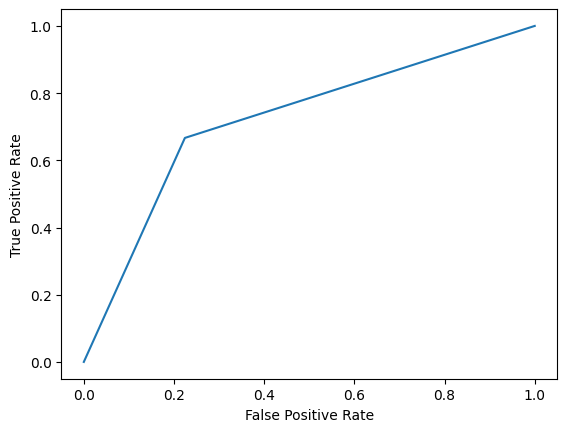

In [74]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print("TensorFLow Accuracy:",score*100,"%")

TensorFlowPred1 = classifier.predict(XTestValues1)
TensorFlowPred2 = classifier.predict(XTestValues2)

plot_roc_curve(y_test,y_pred)
print(f"TensorFlow AUC Score: {roc_auc_score(y_test,y_pred)}")

In [75]:
# Make predictions with example test values
print(TensorFlowPred1) 
print(TensorFlowPred2)

[[0.10073901]]
[[0.9455779]]


In [76]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

# Define K-Fold Cross Validation
#cv = RepeatedKFold(n_splits=203,n_repeats=3,random_state=1)

# Define predictor and target variables
X = df[["age",'sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y = df["target"]

# Linear Regression
LinearModel1 = LinearRegression().fit(X_train, y_train)

LinearModel1.predict(X_test)
accuracy = LinearModel1.score(X_test,y_test)

print('The predicted accuracy for Linear Regression is: {0:0.4f}'.format((accuracy*100)),"%\n")

# Ridge Model
RidgeModel1 = Ridge(alpha=10)

RidgeModel1.fit(X_train,y_train)

accuracy = RidgeModel1.score(X_test,y_test)

print('The Predicted accuracy for the Ridge Model is: {0:0.4f}'.format((accuracy*100)),"%\n")

The predicted accuracy for Linear Regression is: 44.6637 %

The Predicted accuracy for the Ridge Model is: 45.1017 %

